In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.integrate import quad, fixed_quad, simps

In [3]:
df = pd.read_csv('data/us_toprevenue.csv')
df

,Unnamed: 0,year,id,revenue,logrevenue,fgrow_log
0,0,2018,0,500343000.0,20.030804,0.027717
1,1,2018,1,244363000.0,19.314165,0.171957
2,2,2018,2,242137000.0,19.305014,0.023268
3,3,2018,3,229234000.0,19.250254,0.147229
4,4,2018,4,201159000.0,19.119606,0.117532
...,...,...,...,...,...,...
29606,29606,1955,456,50400.0,10.827746,0.392149
29607,29607,1955,457,50300.0,10.825760,0.126799
29608,29608,1955,458,50300.0,10.825760,0.581805
29609,29609,1955,459,50200.0,10.823770,0.103965


In [4]:
df1 = df[['logrevenue', 'fgrow_log']] 
df1['fgrow_log'].max()

2.2292568544547

In [5]:
df = df1[df1['fgrow_log'] != 0.0]


In [6]:
x = np.asarray(df['logrevenue'])

In [7]:
y = np.asarray(df['fgrow_log']) 

## Scatter Plot

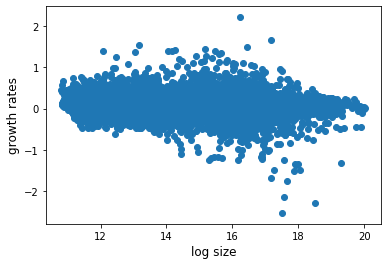

In [8]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('log size', fontsize=12)
ax.set_ylabel('growth rates', fontsize = 12)
plt.show()

## Laplace distribution

In [9]:
def laplace(x, μ, λ):
    return 0.5 * λ * np.exp(- λ * np.abs(x - μ))

#### MLEs for the Laplace Distribution

In [10]:
obs = y[x > 16]
len(obs)

6426

In [11]:
obs.std()

0.19078038385352347

In [12]:
obs.mean()

0.038208746114590304

In [13]:
μ_hat = np.median(obs)

In [14]:
b_hat = np.mean(np.abs(obs - μ_hat))

## Growth Histograms

In [15]:
μ_hat, b_hat

(0.044546078500859565, 0.10838721943457802)

In [16]:
λ_hat = 1/b_hat

In [17]:
λ_hat

9.22618003503259

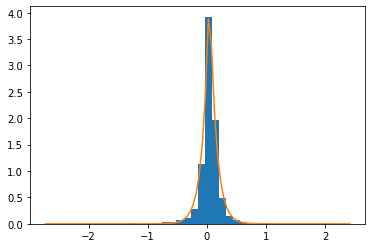

In [18]:
fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)

s = obs.std()
xgrid = np.linspace(obs.min() - s, obs.max() + s, 100)
ax.plot(xgrid, laplace(xgrid, μ=μ_hat, λ=λ_hat))

plt.show()

In [19]:
def compute_alpha(alpha_grid, μ=μ_hat, λ=λ_hat):
    vals = np.zeros_like(alpha_grid)
    for i, α in enumerate(alpha_grid):
        g = lambda x: np.exp(α * x) * laplace(x, μ, λ)
        x_grid = np.linspace(-2, μ, 200)
        y_grid = g(x_grid)
        vals[i] += simps(y_grid, x_grid)
        x_grid = np.linspace(μ, 2, 200)
        y_grid = g(x_grid)
        vals[i] += simps(y_grid, x_grid)

    return vals
        

In [20]:
alpha_grid = np.linspace(0.0, 10.0, 50)

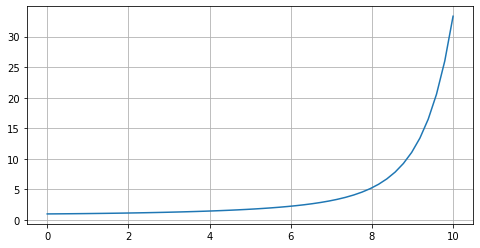

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))
vals = compute_alpha(alpha_grid)
ax.grid()
#ax.set_ylim((0, 2))
#ax.set_yticks((1,))
ax.plot(alpha_grid, vals)
plt.show()

In [22]:
def m(α):
    "Moment generating function E exp(α G) where G is growth rate, Laplace distribution"
    return np.exp(μ_hat * α) / (1 - α**2 / λ_hat**2)

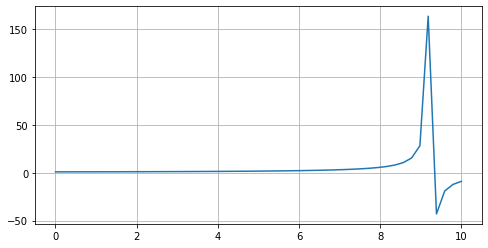

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
vals = m(alpha_grid)
ax.grid()
#ax.set_ylim((0, 2))
#ax.set_yticks((1,))
ax.plot(alpha_grid, vals)
plt.show()